# <header1>프로젝트 과제_4</header1>

### 이겸희_성균관대 

### 학습 준비단계

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from matplotlib import colors
import random
from pathlib import Path
import imageio
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
import cv2

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.21.5
TensorFlow Version :2.9.1
Matplotlib Version :3.5.3


In [121]:
IMAGE_PATH = "../유형별 두피 이미지/Training/원천_합친/"
JSON_PATH = "../유형별 두피 이미지/Training/라벨/"
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3
IMG_SIZE = 64
RANDOM_STATE = 2018
TEST_SIZE = 0.2
VAL_SIZE = 0.2
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
PATIENCE = 5
VERBOSE = 1

In [3]:
plt.rc("font", family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

### 데이터 가져오기

In [111]:
train_label = os.listdir(JSON_PATH)
train_image = os.listdir(IMAGE_PATH)
train_image

['[원천]모낭사이홍반_0.양호',
 '[원천]모낭사이홍반_2.중등도',
 '[원천]모낭사이홍반_3.중증',
 '[원천]모낭홍반농포_0.양호',
 '[원천]모낭홍반농포_1.경증',
 '[원천]모낭홍반농포_2.중등도',
 '[원천]모낭홍반농포_3.중증',
 '[원천]미세각질_0.양호',
 '[원천]미세각질_1.경증',
 '[원천]미세각질_2.중등도',
 '[원천]미세각질_3.중증',
 '[원천]비듬_0.양호',
 '[원천]비듬_1',
 '[원천]비듬_2.중등도',
 '[원천]비듬_3.중증',
 '[원천]탈모_0.양호',
 '[원천]탈모_1.경증',
 '[원천]탈모_2.중등도',
 '[원천]탈모_3.중증',
 '[원천]피지과다_0.양호',
 '[원천]피지과다_1.경증',
 '[원천]피지과다_2.중등도',
 '[원천]피지과다_3.중증']

In [34]:
df = pd.DataFrame(columns=['이미지 이름', '증상명'])

for di in train_image:
    img_name = os.listdir(IMAGE_PATH + di)
    print(di)
#     df = pd.concat([df, (pd.DataFrame({'이미지 이름':img_name,
#                              '증상명': [di * len(img_name)]}))])

# ts_list = np.concatenate(ts_list).tolist()
# tl_list = np.concatenate(tl_list).tolist()

[원천]모낭사이홍반_0.양호
[원천]모낭사이홍반_2.중등도
[원천]모낭사이홍반_3.중증
[원천]모낭홍반농포_0.양호
[원천]모낭홍반농포_1.경증
[원천]모낭홍반농포_2.중등도
[원천]모낭홍반농포_3.중증
[원천]미세각질_0.양호
[원천]미세각질_1.경증
[원천]미세각질_2.중등도
[원천]미세각질_3.중증
[원천]비듬_0.양호
[원천]비듬_1
[원천]비듬_2.중등도
[원천]비듬_3.중증
[원천]탈모_0.양호
[원천]탈모_1.경증
[원천]탈모_2.중등도
[원천]탈모_3.중증
[원천]피지과다_0.양호
[원천]피지과다_1.경증
[원천]피지과다_2.중등도
[원천]피지과다_3.중증


In [36]:
df1 = pd.DataFrame(columns=['이미지 이름', '모낭사이홍반', '모낭홍반농포', '미세각질', '비듬', '탈모', '피지과다'])
df1

,이미지 이름,모낭사이홍반,모낭홍반농포,미세각질,비듬,탈모,피지과다


In [37]:
import json
import os
from tqdm import tqdm

In [93]:
with open(JSON_PATH + "[라벨]모낭사이홍반_0.양호/0013_A2LEBJJDE00060O_1606550825417_3_TH.json", "r", encoding="utf8") as f: 
    contents = f.read()
    json_data = json.loads(contents)
list(json_data.values())

['0013_A2LEBJJDE00060O_1606550825417_3',
 '0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [78]:
json_list = []
for di in train_label:
    file_name = os.listdir(JSON_PATH + di)
    for i in file_name:        
        with open(JSON_PATH + di + '/' + i, "r", encoding="utf8") as f: 
            contents = f.read()
            json_data = json.loads(contents)
            json_list.append(list(json_data.values()))

In [113]:
a = np.array(json_list)
data = pd.DataFrame(a, columns=['이미지 id', '이미지 이름', '모낭사이홍반', '모낭홍반농포', '미세각질', '비듬', '탈모', '피지과다'])
data

,이미지 id,이미지 이름,모낭사이홍반,모낭홍반농포,미세각질,비듬,탈모,피지과다
0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,0,0,0,0,0,0
1,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,0,0,0,0,0,0
2,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,0,0,0,0,0,0
3,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,0,0,0,0,0,0
4,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
138462,9905_A2LEBJJDE00042M_1604479719335_2,9905_A2LEBJJDE00042M_1604479719335_2_TH.jpg,0,3,0,0,0,0
138463,9905_A2LEBJJDE00042M_1605325854091_2,9905_A2LEBJJDE00042M_1605325854091_2_TH.jpg,0,3,0,0,0,0
138464,9905_A2LEBJJDE00042M_1605410025119_3,9905_A2LEBJJDE00042M_1605410025119_3_TH.jpg,0,3,1,0,2,0
138465,9905_A2LEBJJDE00042M_1605410025119_4,9905_A2LEBJJDE00042M_1605410025119_4_LH.jpg,0,3,1,0,3,0


### 데이터 분류 및 학습준비

In [115]:
# , stratify=data['낭사이홍반', '모낭홍반농포', '미세각질', '비듬', '탈모', '피지과다']
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)


In [116]:
# , stratify=train_df['낭사이홍반', '모낭홍반농포', '미세각질', '비듬', '탈모', '피지과다']
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [118]:
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))
print("Val   set rows: {}".format(val_df.shape[0]))

Train set rows: 88618
Test  set rows: 27694
Val   set rows: 22155


In [130]:
def read_image(file_name):
    try:
        image = skimage.io.imread(IMAGE_PATH + file_name)
    except:
        return ''
    else: 
        image = skimage.io.imread(IMAGE_PATH + file_name)
        image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), mode='reflect')
    return image[:,:,:IMAGE_CHANNELS]

In [133]:
def categories_encoder(dataset):
    X = np.stack(dataset['이미지 이름'].apply(read_image))
    y = dataset[['낭사이홍반', '모낭홍반농포', '미세각질', '비듬', '탈모', '피지과다']]
    return X, y


In [ ]:
X_train, y_train = categories_encoder(train_df)
X_val, y_val = categories_encoder(val_df)
X_test, y_test = categories_encoder(test_df)

### 모델 생성

In [25]:
# n_class = len(cls)
# model = tf.keras.models.Sequential()
# model.add(tf.keras.applications.densenet.DenseNet121(
#     weights="imagenet", 
#     include_top=False, 
#     input_shape=(64, 64, 3)
#     ))
# model.add(tf.keras.layers.Flatten(name='flatten'))
# model.add(tf.keras.layers.Dense(1024, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dense(y_train.columns.size, activation='softmax'))

# model.summary()
model = tf.keras.models.Sequential()
# conv 1
model.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 2
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 3
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                           # DO3
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_class, activation='softmax'))

model.summary()

NameError: name 'n_class' is not defined

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)

### 모델 학습

In [156]:
%%time 
#한 번만 수행하지만 CPU 수행 시간과 실제 시간을 같이 출력합니다. %%time
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience = 10)
train_model1 = model.fit(X_train, y_train, epochs=3,
                            validation_data=(X_val, y_val))
# train_model1  = model.fit_generator(image_generator.flow(X_train, y_train),
#                         epochs=4,
#                         validation_data=[X_val, y_val],
#                         callbacks = [early_stopping])

Epoch 1/3
193/193 [==============================] - 157s 752ms/step - loss: 0.8104 - accuracy: 0.7426 - val_loss: 1.8085 - val_accuracy: 0.5865
Epoch 2/3
193/193 [==============================] - 135s 697ms/step - loss: 0.4114 - accuracy: 0.8379 - val_loss: 1.3461 - val_accuracy: 0.7159
Epoch 3/3
193/193 [==============================] - 135s 701ms/step - loss: 0.4227 - accuracy: 0.8449 - val_loss: 1.2048 - val_accuracy: 0.6964
Wall time: 7min 6s


In [161]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2903856039047241
Test accuracy: 0.6796671748161316


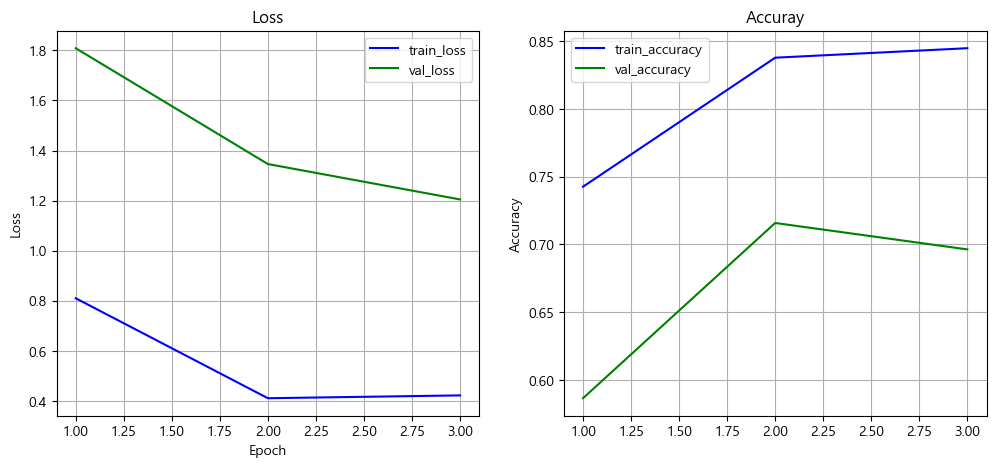

In [162]:
loss = train_model1.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, train_model1.history['loss'], 'b', label='train_loss')
plt.plot(epochs, train_model1.history['val_loss'], 'g', label='val_loss')

plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, train_model1.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, train_model1.history['val_accuracy'], 'g', label='val_accuracy')

plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [163]:
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])

In [164]:
test_accuracy_report(model)

61/61 [==============================] - 7s 114ms/step
                          precision    recall  f1-score   support

                 뉴에르도테캡슐       0.41      0.49      0.44        65
           듀카브정30/10밀리그램       1.00      0.65      0.79       259
            듀카브정30/5밀리그램       0.97      0.77      0.86       259
                  라노펜세미정       1.00      0.74      0.85        43
   락토엔큐캡슐(바실루스리케니포르미스균)        0.32      0.66      0.43        65
   루키오정10밀리그램(몬테루카스트나트륨)       1.00      1.00      1.00       260
             리셀톤캡슐 6.0mg       0.47      1.00      0.64        65
             리프레가캡슐 75mg       1.00      0.71      0.83        65
           뮤코원캡슐(에르도스테인)       0.37      0.65      0.47        65
                바실리포미스캡슐       0.55      0.45      0.49        65
              베아로탄정 50mg       1.00      0.28      0.44        43
                   베아투스정       1.00      0.26      0.41        43
   비오메틱스캡슐(바실루스리케니포르미스균)       0.84      0.86      0.85        65
            비우미정 500

## 데이터 양 균일화 후 학습

In [59]:
train_df2, test_df2 = train_test_split(df4, test_size=0.2, random_state=42, stratify=df4['Medicine_Name'])

In [60]:
train_df2, val_df2 = train_test_split(train_df2, test_size=0.2, random_state=42, stratify=train_df2['Medicine_Name'])

In [61]:
train_df2, val_df2 = train_test_split(train_df2, test_size=0.2, random_state=42, stratify=train_df2['Medicine_Name'])

In [62]:
X_train2, y_train2 = categories_encoder(train_df2)
X_val2, y_val2 = categories_encoder(val_df2)
X_test2, y_test2 = categories_encoder(test_df2)

In [82]:

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.applications.densenet.DenseNet121(
    weights="imagenet", 
    include_top=False, 
    input_shape=(64, 64, 3)
    ))
model2.add(tf.keras.layers.Flatten(name='flatten'))
model2.add(tf.keras.layers.Dense(1024, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(y_train2.columns.size, activation='softmax'))

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              4195328   
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 21)                21525     
                                                                 
Total params: 11,258,453
Trainable params: 11,172,757
Non-trainable params: 85,696
_____________________________________

In [83]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
%%time 
#한 번만 수행하지만 CPU 수행 시간과 실제 시간을 같이 출력합니다. %%time


train_model2  = model2.fit(X_train2, y_train2, epochs=10,
                           validation_data=(X_val2, y_val2),
                           callbacks = [early_stopping])

Epoch 1/10
92/92 [==============================] - 74s 670ms/step - loss: 1.1823 - accuracy: 0.6253 - val_loss: 9.0913 - val_accuracy: 0.2647
Epoch 2/10
92/92 [==============================] - 60s 653ms/step - loss: 0.6412 - accuracy: 0.7369 - val_loss: 3.3744 - val_accuracy: 0.4775
Epoch 3/10
92/92 [==============================] - 58s 625ms/step - loss: 0.3962 - accuracy: 0.8222 - val_loss: 1.1690 - val_accuracy: 0.6849
Epoch 4/10
92/92 [==============================] - 58s 628ms/step - loss: 0.3538 - accuracy: 0.8471 - val_loss: 0.9769 - val_accuracy: 0.7312
Epoch 5/10
92/92 [==============================] - 58s 637ms/step - loss: 0.3023 - accuracy: 0.8522 - val_loss: 0.8211 - val_accuracy: 0.7613
Epoch 6/10
92/92 [==============================] - 57s 617ms/step - loss: 0.3513 - accuracy: 0.8491 - val_loss: 1.4103 - val_accuracy: 0.6698
Epoch 7/10
92/92 [==============================] - 63s 683ms/step - loss: 0.3735 - accuracy: 0.8430 - val_loss: 0.7656 - val_accuracy: 0.7640

In [142]:
score2 = model2.evaluate(X_test2, y_test2, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.3430149257183075
Test accuracy: 0.8419213891029358


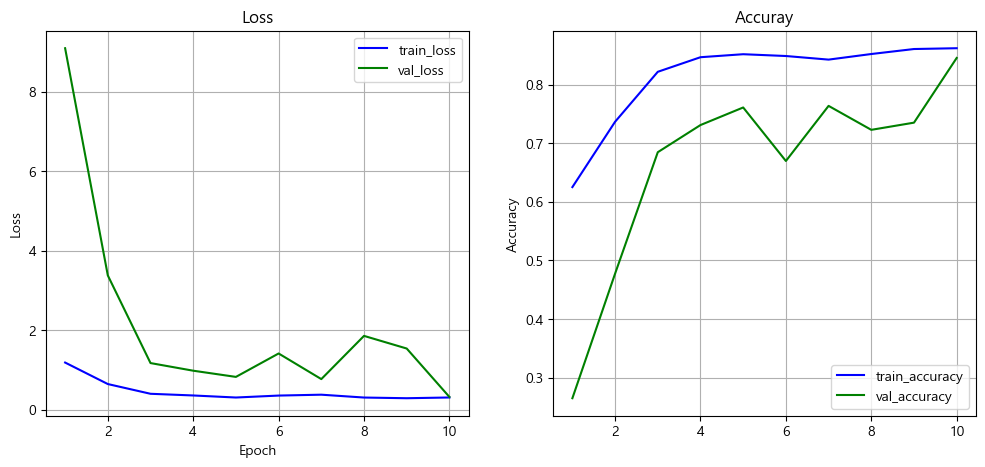

In [102]:
loss = train_model2.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, train_model2.history['loss'], 'b', label='train_loss')
plt.plot(epochs, train_model2.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, train_model2.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, train_model2.history['val_accuracy'], 'g', label='val_accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [106]:
def test_accuracy_report2(model2):
    predicted = model2.predict(X_test2)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test2.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test2.columns)) 
    test_res = model2.evaluate(X_test2, y_test2.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])

In [107]:
test_accuracy_report2(model2)

36/36 [==============================] - 6s 104ms/step
                          precision    recall  f1-score   support

                 뉴에르도테캡슐       1.00      0.66      0.80        65
                  라노펜세미정       1.00      0.77      0.87        43
   락토엔큐캡슐(바실루스리케니포르미스균)        0.00      0.00      0.00        65
             리셀톤캡슐 6.0mg       0.97      1.00      0.98        65
             리프레가캡슐 75mg       1.00      1.00      1.00        65
           뮤코원캡슐(에르도스테인)       0.70      0.22      0.33        65
                바실리포미스캡슐       0.49      1.00      0.66        65
              베아로탄정 50mg       1.00      1.00      1.00        43
                   베아투스정       1.00      1.00      1.00        43
   비오메틱스캡슐(바실루스리케니포르미스균)       1.00      0.92      0.96        65
            비우미정 500mg/병       1.00      1.00      1.00        43
            아나그레캡슐 0.5mg       1.00      1.00      1.00        65
앤도민300프리미엄연질캡슐 300mg/PTP       1.00      1.00      1.00        65
                   에